![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

# Using Scikit-learn

We have used scikit-learn already in our basic polynomial fitting.  but let us use it in a more systematic way, and consider some issues that we need to in real-world data science.

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

# Data Analysis for Machine Learning

We'll work with a Kaggle dataset: [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction).

These are the features of the dataset:

* **id**: a notation for a house
* **date**: Date house was sold
* **price**: Price is prediction target
* **bedrooms**: Number of Bedrooms/House
* **bathrooms**: Number of bathrooms/bedrooms
* **sqft_living**: square footage of the home
* **sqft_lot**: square footage of the lot
* **floors**: Total floors (levels) in house
* **waterfront**: House which has a view to a waterfront
* **view**: Has been viewed
* **condition**: How good the condition is ( Overall )
* **grade**: overall grade given to the housing unit, based on King County grading system
* **sqft_above**: square footage of house apart from basement
* **sqft_basement**: square footage of the basement
* **yr_built**: Built Year
* **yr_renovated**: Year when house was renovated
* **zipcode**: zip
* **lat**: Latitude coordinate
* **long**: Longitude coordinate
* **sqft_living15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* **sqft_lot15**: lotSize area in 2015(implies-- some renovations)

Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn_pandas import DataFrameMapper

## Exploratory Data Analysis

Loading the dataframe:

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Step 1: 5-minute health check

The first step when analyzing data is cleaning. Understanding if we've loaded the data correctly and we have valid values. This is a process that will involve multiple steps, but for now, we start with our _5 minute_ check:

In [5]:
df.shape

(21613, 21)

With `shape` we know that there are 21,613 rows, with 21 columns (features). Let's check for red flags on those features:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


`info` gives you a quick summary of both the type and the count for each column. In this case the data seems correct, there are no missing values and the types are correct.

### Step 2: High level Feature Selection

Our objective is to predict the price of a house based on the features that we know about the house. For example, we know that a larger surface area and more bedrooms will relate with a highest price. But what about the `id` of the house? It's probably just an internal ID and is not affecting the real price.

That is feature selection, understanding what features are important to the ML model.

With pandas is extremely simple to exclude columns:

In [7]:
df.drop(columns=['id']).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


What other variables would you exclude? For this workshop, we'll exclude `date`, `lat` and `long`. We could have done a better analysis for `lat` and `long`, but with `zipcode` it's probably enough.

In [8]:
df.drop(columns=['id', 'date', 'lat', 'long'], inplace=True)

### Step 3: Correlation between variables

Some variables will have higher (positive or negative) correlation with the price. We know that the surface area of a house is positively correlated with its price: the larger the house, a higher price. But what about others? We can build a simple correlation plot to understand a little bit better the relationship between different variables:

In [13]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.713202,0.119248


So, for example, we can see that `sqft_living` is highly correlated with the `price`:

In [15]:
df.corr().loc['sqft_living', 'price']

0.7020350546118009

We'll use a simple visualization mechanism to have a visual clue about these variables and their correlation:

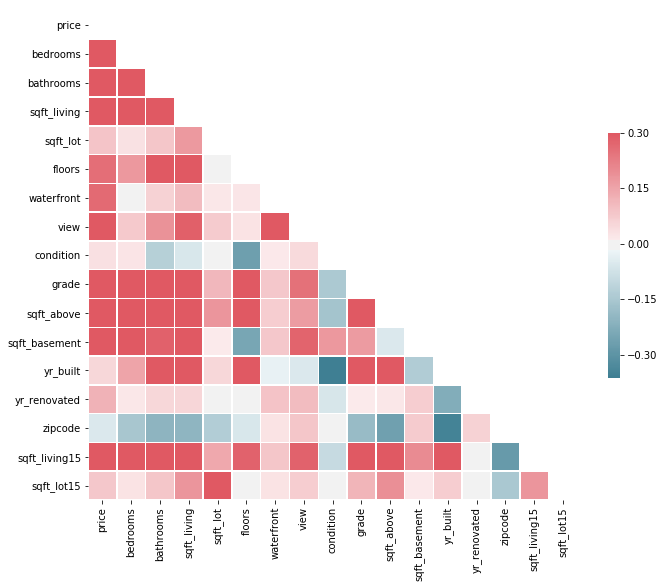

In [16]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We see some strange patterns, like for example, the apparent "negative" correlation between `zipcode` and price. Something that doesn't make any sense. We'll talk more about this when we explore `zipcode` as a categorical feature later.

Once we identify correlation between different variables, we can explore how they're correlated. For example, we saw `sqft_living` and `price`:

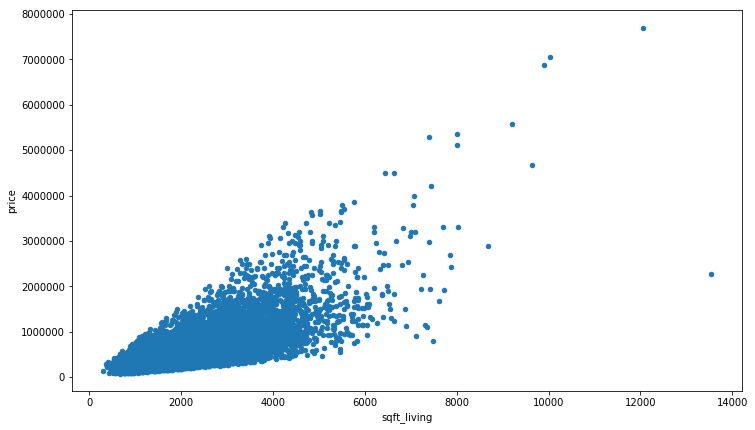

In [18]:
df.plot(x='sqft_living', y='price', kind='scatter', figsize=(12, 7))

What about `grade` and `price`?

In [20]:
df.corr().loc['grade', 'price']

0.667434256020255

They also seem strongly correlated, but, are they just linearly correlated?

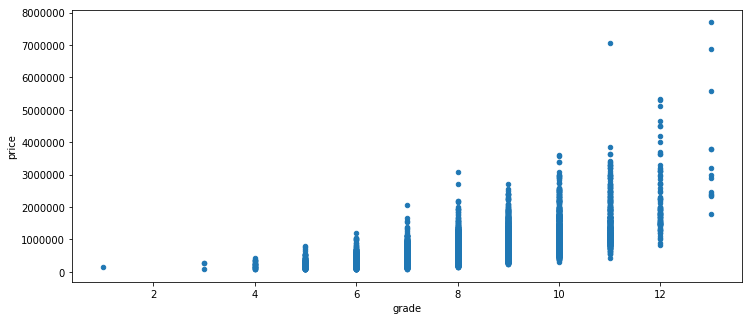

In [22]:
df.plot(x='grade', y='price', kind='scatter', figsize=(12, 5))

Doesn't seem so, or at least it's not as clear as with `sqft_living`. There seems to be some sort of polynomic relationship. We can use a logarithmic y axis to test:

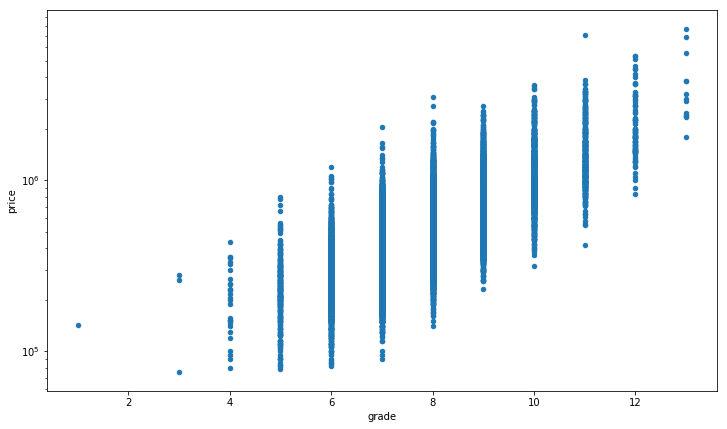

In [24]:
df.plot(x='grade', y='price', kind='scatter', figsize=(12, 7), logy=True)

It now looks a little bit better. We can use these relationships we've identified to improve our model later.

### Step 4: More cleaning, identifying outliers

Linear regression (along with other ML models) will be really sensitive to outliers:

In [35]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_log
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652,13.047817
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631,0.526685
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,11.225243
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,12.682152
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,13.017003
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,13.377006
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,15.856731


🤔A house with 33 bedrooms? There's something going on here:

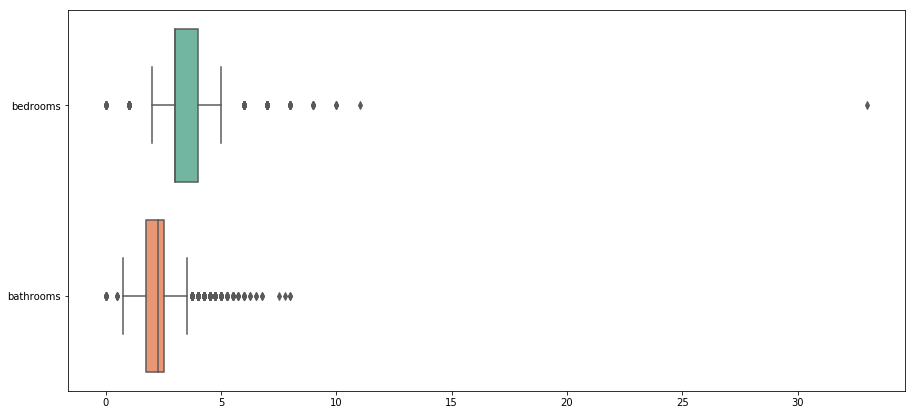

In [38]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data=df[['bedrooms', 'bathrooms']], orient="h", palette="Set2")

It makes sense for a (really expensive) house to have, let's say 10 bedrooms, but 33 seems like an error.

In [40]:
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_log
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700,13.369223


33 bedrooms and only 1.75 bathrooms? 😅 clearly an error.

In [42]:
df.drop(15870, inplace=True)

Now, what about those properties without bathrooms? That is strange, let's take a look:

In [45]:
df[df['bathrooms'] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_log
875,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,2360,4000,13.906265
1149,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,1160,42882,11.225243
3119,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,1470,1399,12.847927
5832,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,990,22549,12.542545
6994,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061,14.074523
9773,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050,12.779873
9854,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,1060,7200,12.367341
10481,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,1690,19290,13.089840
14423,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,1380,9600,11.849040
19452,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,1620,22850,11.863582


Now that we look at it it makes a little bit more sense. Maybe those are just warehouses or other type of storage unit facilities? Without more information is now difficult to make a decision. This is an important lesson: **domain expertise is fundamental when analyzing data**

I'll not remove any house for now.

How are other variables doing?

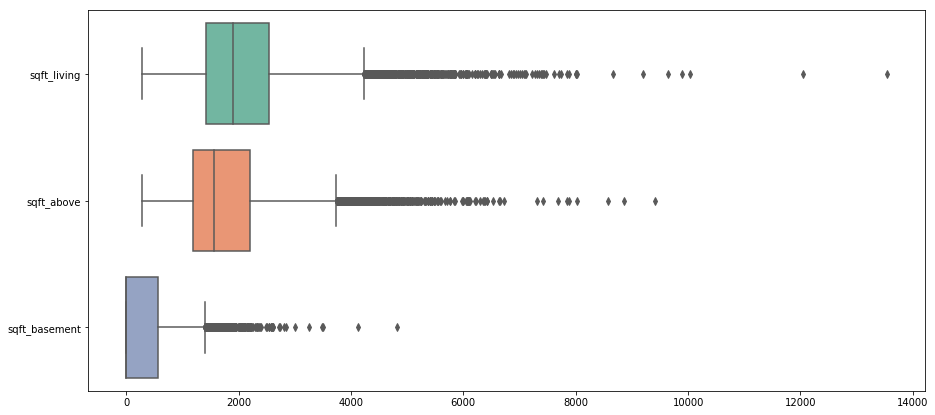

In [44]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data=df[['sqft_living','sqft_above', 'sqft_basement']], orient="h", palette="Set2")

This probably requires a little bit more analysis, but let's proceed.

### Step 5: Dummy variables

The `zipcode` feature imposes an issue. Machine learning models, don't understand "human" features like `zipcode`. For a ML algorithm, a value of `98178` in zipcode is "greater" than `98125`, even though for us, knowing the area, the zipcode `98125` might have more expensive houses. These are the zipcodes in our dataset:

In [46]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [53]:
len(df['zipcode'].unique())

70

Only 70 zipcodes:

In [51]:
df['zipcode'].value_counts()

98103    601
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Introducing "Dummy Variables":

In [54]:
pd.get_dummies(df['zipcode'])

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dummy variables is the correct way to feed a ML model a categorical feature. We'll see how to combine these later.

### Step 6: Feature scaling and normalization

There's a final **IMPORTANT** point to discuss, and that is "scaling" and "normalizing" features. It has a mathematical explanation, but basically, what we **DON'T** want is to have features that are in completely different units. For example:

In [57]:
df[['bedrooms', 'sqft_living']].head()

,bedrooms,sqft_living
0,3,1180
1,3,2570
2,2,770
3,4,1960
4,3,1680


The values here are too dissimilars, which will make some algorithms perform poorly and slower. We'll then "scale" these features to remove the unit. Read more here: [Importance of Feature Scaling](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

In [58]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = preprocessing.StandardScaler().fit(df[['bedrooms', 'sqft_living']].head())

In [61]:
scaler.transform(df[['bedrooms', 'sqft_living']].head())

array([[ 0.        , -0.72618899],
       [ 0.        ,  1.50700281],
       [-1.58113883, -1.38490024],
       [ 1.58113883,  0.526969  ],
       [ 0.        ,  0.07711741]])

### Step 7: Putting it all together

We'll now use a really convenient package called [sklearn-pandas](https://github.com/scikit-learn-contrib/sklearn-pandas) that will let us scale our features and also create the Dummy zip variables:

In [67]:
ScalerClass = preprocessing.StandardScaler

In [68]:
mapper = DataFrameMapper([
    (['bedrooms'], ScalerClass()),
    (['bathrooms'], ScalerClass()),
    (['sqft_living'], ScalerClass()),
    (['sqft_lot'], ScalerClass()),
    (['floors'], ScalerClass()),
    (['condition'], ScalerClass()),
    (['grade'], ScalerClass()),
    (['sqft_above'], ScalerClass()),
    (['sqft_basement'], ScalerClass()),
    (['sqft_living15'], ScalerClass()),
    (['sqft_lot15'], ScalerClass()),

    ('zipcode', preprocessing.LabelBinarizer()),
    ('yr_built', None),
    ('yr_renovated', None),

    ('waterfront', None),
    ('view', None)    
])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    mapper.fit_transform(df.drop(columns=['price'])), df['price'], test_size=0.3, random_state=10)

/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/santi

### Step 8: Profit

Let's see now how our Linear Regression is performing with these simple modifications:

In [70]:
model = LinearRegression()

In [71]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
model.score(X_test, y_test)

0.7933953869168434

**0.79**! Much better, right? This is just an introduction on how important it is a good process of data analysis applied to Machine Learning.